In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [16]:
# Download TSLA stock price for last 5 years
df = yf.download('TSLA', start='2018-01-01', end='2024-12-31')
df = df[['Close']]  # Keep only the target
df.dropna(inplace=True)

# Reset index
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df.head()


<ipython-input-16-3801611121>:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('TSLA', start='2018-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,TSLA
Date,
2018-01-02,21.368668
2018-01-03,21.150000
2018-01-04,20.974667
2018-01-05,21.105333
2018-01-08,22.427334


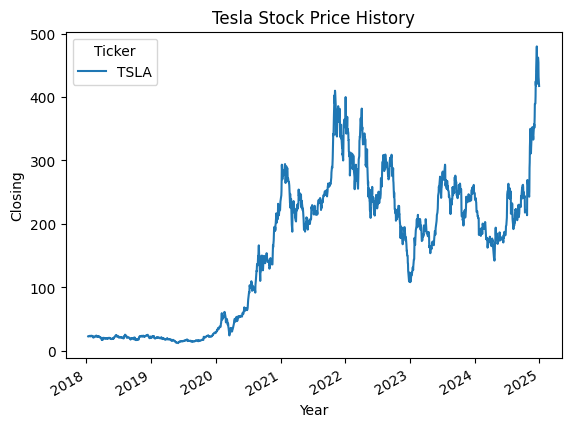

In [19]:
import matplotlib.pyplot as plt
df['Close'].plot(xlabel='Year',ylabel='Closing',title="Tesla Stock Price History")
plt.show()

In [17]:
df['lag_1'] = df['Close'].shift(1)
df['lag_7'] = df['Close'].shift(7)
df['rolling_mean_3'] = df['Close'].rolling(window=3).mean()
df['rolling_std_3'] = df['Close'].rolling(window=3).std()
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

df.dropna(inplace=True)


In [18]:
# 80% train, 20% test
split_index = int(len(df) * 0.8)
train = df.iloc[:split_index]
test = df.iloc[split_index:]

X_train = train.drop(columns='Close')
y_train = train['Close']
X_test = test.drop(columns='Close')
y_test = test['Close']


In [20]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [21]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"📉 RMSE: {rmse:.2f}, MAE: {mae:.2f}")


📉 RMSE: 6.24, MAE: 4.41


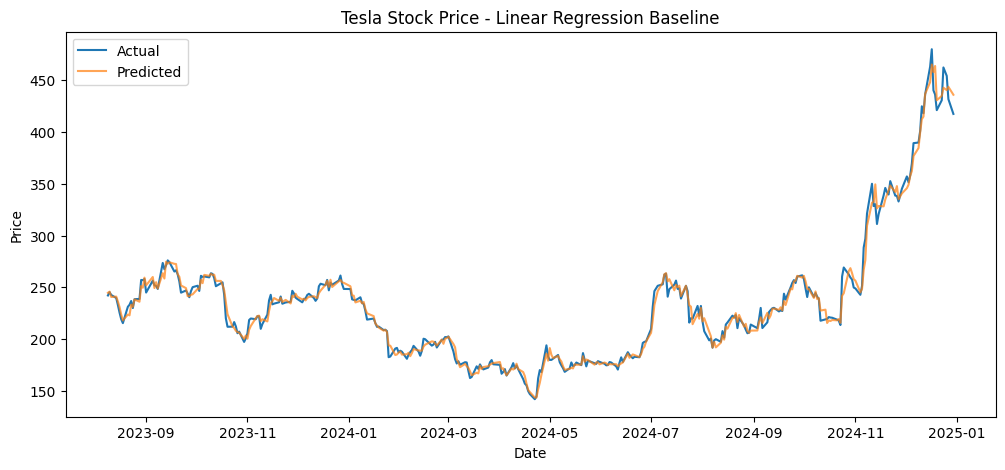

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Predicted", alpha=0.7)
plt.title("Tesla Stock Price - Linear Regression Baseline")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


<ipython-input-25-2801768119>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, y='Feature', x='Importance', palette='viridis')


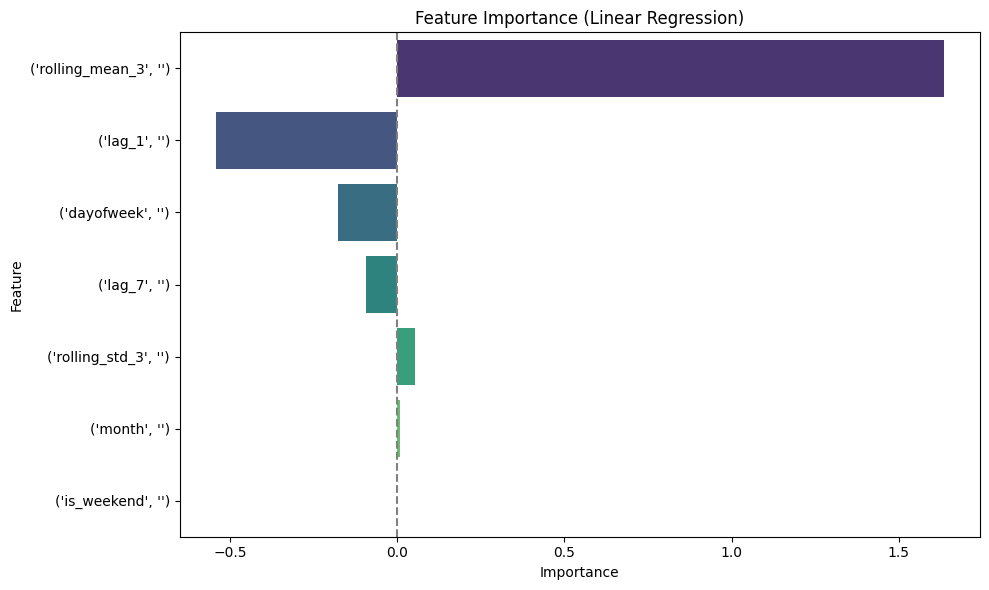

In [25]:
import seaborn as sns

# Create DataFrame for features and their coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.coef_.flatten()
})

# Convert the 'Feature' column to a simple list of strings
feature_importance['Feature'] = feature_importance['Feature'].astype(str)

# Sort by absolute value of coefficients (importance)
feature_importance['abs_importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values('abs_importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, y='Feature', x='Importance', palette='viridis')
plt.title("Feature Importance (Linear Regression)")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

In [27]:
import joblib
joblib.dump(model, 'linear_model_v1.pkl')  # Save the model to a file

from google.colab import files
files.download('linear_model_v1.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>